### 1. Two Sum
---
Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

 

Example 1:

Input: nums = [2,7,11,15], target = 9
Output: [0,1]<br>
Output: Because nums[0] + nums[1] == 9, we return [0, 1].

Example 2:

Input: nums = [3,2,4], target = 6
Output: [1,2]<br>

Example 3:

Input: nums = [3,3], target = 6
Output: [0,1]

### 두 수의 합
---
덧셈하여 타겟을 만들 수 있는 배열의 두 숫자 인덱스를 리턴하라.

* __입력__
> nums =[2,7,11,15], target = 9
* __출력__
> [0,1]
* __설명__ <br>
 nums[0] +nums[1] = 2 + 7 = 9<br>
 따라서 0,1을 리턴한다.

### 풀이 1. 브루트 포스로 계산
---
이 문제는 매우 쉽다. 그러나 최적화할 수 있는 여러가지 방법이 숨어 있어서, 코딩 인터뷰 시 높은 빈도로 출제되는 문제다. 무엇보다 리트코드의 1번 문제라서, 여러분이 리트코드를 처음 접하게 되면 가장 먼저 만나는 문제이기도 하다. 이 문제에 대한 풀이는 한번 쉽게 생각해보자 배열을 2번 반복하면서 모든 조합을 더해서 일일이 확인해보는 무차별 대입 방식인 브루트 포스(Brute-Force)로 다음 그림 7-3과 같이 확인할 수 있다.
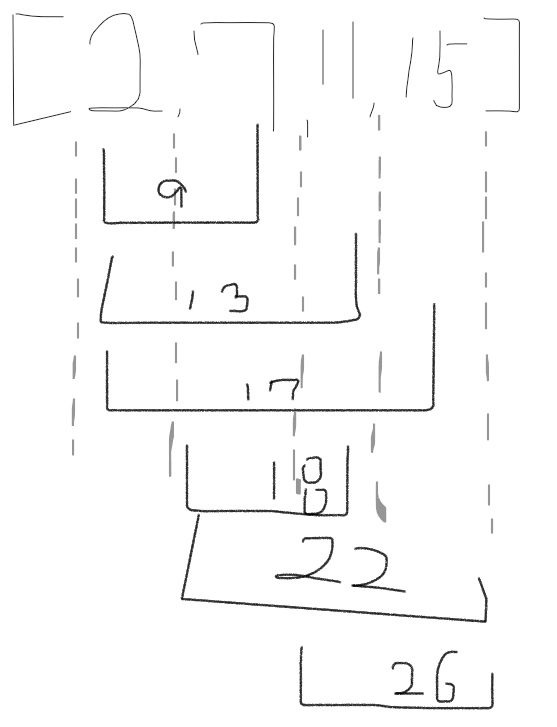
__그림 7-3__ 브루트 포스 풀이 

이 그림에서는 정답을 찾기 위해 2부터 시작해 다른요소들인 7,11,15를 차례대로 모두 비교한다. 즉 2+7,2+11,2+15와 같은 식으로 마지막 요쇼들까지 모두 차례대로 비교해 가며 정답을 찾을 때까지 계속 진행한다. 이 방식이 바로 무차별 대입 방식인 브루트 포스로서, 앞으로 문제를 풀 때 비효율적인 풀이법에서 꼭 한 번씩 첫 번째 풀이로 등장할 것이다. 전체 풀이 코트는 다음과 같다.

def twoSum(self, nums: List[int], target: int) -> List[int]: <br>
&nbsp;&nbsp;&nbsp;for i in range(len(nums)): <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;for j in range(i + 1, len(nums)):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;if nums[i] + nums[j] == target:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;return [i, j]

이 경우 풀이 시간 복잡도는 _O(n^2)_ 이다. 정확히는 1/2 n^2정도가 되겠지만 시간 복잡도를 표기할 때 상수항은 기입하지 않기 때문에 n^2이다. 이 풀이는 5,284밀리초나 소요됐다. 문제가 풀리기는 하지만 브루트 포스 방식은 지나치게 느리다. 좀 더 최적화할 수 있는 방안을 고민해야 한다. 이어지는 다른 방식의 풀이에서 최적화하는 여러 방법을 좀 더 살펴보자.

In [ ]:
def twoSum(self, nums: List[int], target: int) -> List[int]:
    for i in range(len(nums)):
        for j in range(i + 1, len(nums)):
            if nums[i] + nums[j] == target:
                return [i, j]

###  풀이 2. in을 이용한 탐색 
---
모든 조합을 비교하지 않고 정답, 즉 타겟에서 첫 번째 값을 뺀 값 target - n이 존재하는지 탐색하는 문제로 변경해보자. 이 경우 전체 코드는 다음과 같이 정리할 수 있다. 
    
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        for i,n in enumerateu(nums):
            complement = target - n
            if complement in nums[i+1:]:
                return nums.index(n), nums[i + 1].index(complement) + (i + 1)
            
여기서 in의 시간복잡도는 _O(n)_ 이고, 따라서 전체 시간 복잡도는 이전과 동일한 _O(n^2)_ 이다. 그런데 여기서는 시간 복잡도라도 in 연산 쪽이 훨씬 더 가볍고 빠르다. 시간 복잡도는 상수항을 생략하기 때문에 알아차리기 힘들지만 이 풀이의 경우 파이썬의 내부 함수로 구현된 in은 파이썬 레벨에서 매번 값을 비교하는 것에 비해 훨씬 더 빨리 실행된다. 시간 복잡도만으로는 드러나지 않지만, 여기서 생략된 상수항은 이전 풀이에 비해 훨씬 더 작은 값이라고 할 수 있다. 실제로 리트코드에서도 훨씬 더 빨리 실행된다. 864밀리초 만에 실행이 가능하다.

In [ ]:
for i,n in enumerateu(nums):
    complement = target - n
    if complement in nums[i+1:]:
        return nums.index(n), nums[i + 1].index(complement) + (i + 1)

###  풀이 3. 첫번째 수를 뺀 결과 키 조회
---
이번에는 시간 복잡도를 개선해 속도를 높여보자. 비교나 탐색 대신 한 번에 정답을 찾을 수 있는 방법은 없을까? 우선 전체 코드를 살펴보면 다음과 같다. 

In [ ]:
def twoSum(self, nums: List[int], target: int) -> List[int]:
    nums_map = {}
    #키와 값을 바꿔서 딕셔너리로 저장
    for i,n in enumerate(nums):
        nums_map[num] = i
        
    # 타겟에서 첫 번째 수를 뺀 결과를 키로 조회
    for i, num in enumerate(nums):
        if target - num in nums_map and i != nums_map[target - num]:
            return nums.index(num), nums_map[target - num]

이 경우 타겟에서 첫 번째 수를 빼면 두 번째 수를 바로 알아낼 수 있다. 그렇다면 두 번째 수를 키로하고 기존의 인덱스는 값으로 바꿔서 딕셔너리로 저장해두면 나중에 두 번째 수를 키로 조회해서 정답을 즉시 찾아낼 수 있을 것이다. 이제 타겟에서 처 번째 수를 뺀 결과를 키로 조회해보면 두 번째 수의 인덱스를 즉시 조회할 수 있다. 딕셔너리는 해시 테이블로 구현되어 있고, 이 경우 조회는 평균적으로 _O(1)_ 에 가능하다. 최악의 경우에는 _O(N^2_ 이 되겠지만 말 그대로 최악의 경우이고 드문 경우이므로, 4장에서 살펴본 분할  상환분석에 따른 시간 복잡도는 _O(1)_ 이며 전체는 _O(n)_ 이 된다. 앞서 풀이 #2의 시간 복잡도인 _O(n^2)에 배해 훨씬더 빠른속도를 보여줄 것이다. 실제로 불과  48밀리초 만에 실행된다.

###  풀이 4. 조회 구조 개선 
---
딕셔너리 저장과 조회를 2개의 for 문으로 각각 처리 했던 방식을 좀 더 개선해서 이번에는 하나의 for로 합쳐서 처리해보자. 이 경우 전체를 모두 저장할 필요 없이 정답을 찾게되면 함수를 바로 빠져나올 수 있다. 그러나 두 번째 값을 찾기 위해 어차피 매번 비교해야하기 때문에 앞서 풀이에 비해 서능상의 큰 이점은 없을 것 같다.

In [ ]:
def twoSum(self, nums: List[int], target: int) -> List[int]:
    nums_map = {}
    # 하나의 for 문으로 통합
    for i, n in enumerate(nums):
        if target - num in nums_map:
            return [nums_map[target - num], i]
        nums_map[num] = i

실행 속도를 확이해보니 예상했던 것처럼 44밀리초로 앞서 풀이와 큰 차이는 없다. 그러나 코드는 할결 더 간결해졌다.

###  풀이 5. 투 포인터 이용
---
이 문제를 투포인터로 풀 수 있을까? 투 포인터란 왼쪽 포인터와 오른쪽 포인터의 합이 타겟보다 크다면 오른쪽 포인터를 왼쪽으로, 작다면 오른쪽 포인터로 옮기면서 값을 조정하는 방식이다.(투 포인터에 대한 좀 더 자세한 설명은 189페이지의 박스 설명을 참고하자.)이런 바식으로 다음 그림 7-4와 같이 타겟에 일치하는 2개의 포인터를 찾아 나간다.

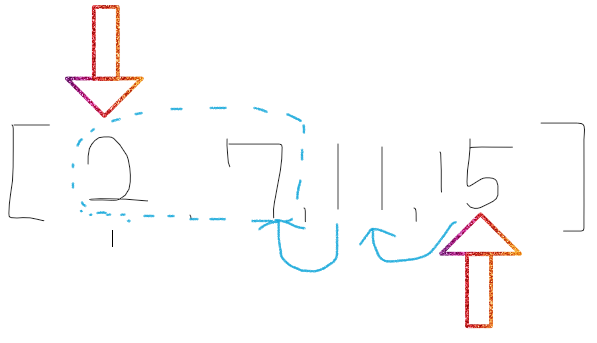

* __그림 7-4__ 투 포인터 풀이 

이 그림에서 타겟인 9를 찾기 위한 양쪽 포인터의 합은 맨 처음에는 각각 2와 15에 위치했기 때문에 17이었다. 이때 합의 값이 9보다 크기때문에 오른쪽 포인터는 하나씩 왼쪽으로 이동했다. 그리고 7에 이르러서 2 + 7 =9인 정답 위치 0,1을 찾을 수 있었다. 우선 전체코드는 다음과 같다.

In [ ]:
def twoSum(self, nums: List[int], target: int) -> List[int]:
    left, right = 0, len(nums) -1
    while not left == right:
        # 합이 타겟보다 크면 오른쪽 포인터를 왼쪽으로 
        if nums[left] + nums[right] < target:
            left += 1
        # 랍이 타겟보다 작으면 왼쪽 포인터를 오른쪽으로
        elif nums[left] + nums[right] > target:
            right -= 1
        else:
            return left, right

이처럼 투 포인터로 구현해보니 코드도 간결하고 이해하기 쉽다. 투포인터의 시간복잡도도 _O(n)_ 이고, 불필요한 추가 계산도 필요 없어, 매우 빠른 속도가 기대된다. 그러나 이 문제는 투 포인터로 풀 수 없다. 왜냐면 입력값이 nums는 정렬된 상태가 아니기 때문이다. 제대로 풀이하려면 정렬이 필요하다. 따라서 다음과 같이 정렬 로직을 추가 해보자.

    def twoSum(self, nums: List[int], target: int) -> List[int]:
        nums.sort()
        ...
        
그런데 이렇게 하면 인덱스는 모두 엉망이 되기 때문에 매우 심각한 문제가 발생한다. 만약 이 문제가 인덱스가 아니라 값을 찾아내는 문제라며느 얼마든지 정렬하고 투 포이너로 풀이할 수 있다. 하지만 이처럼 인덱스를 찾아내는 문제에서는 이렇게 정렬을 통해 인덱스를 섞어 버리면 곤란하다. 원래 인덱스를 찾을수가 없기 때문이다.

만약 풀이를 잘못 택해서 이와같이 정렬하는 형태로 풀이를 진행했다면, 정답을 찾아내지못해 상당히 고생할 것이다. 특히 제한 시간이 있는 온라인 코딩 테스트에서는 시간내에 정답을 입력하지 못할 가능성이 매우 크다. 차라리 오프라인 인터뷰라면 이 경우 면접관이 틀린 부분을 지적해줄 수 있어 바로 다른 풀이로 넘어갈 수 있다. 하지만 온라인트에서 누군간가 틀린 부분을 지적해줄 수 없기 때문에, 이런 부분에서 시간을 허비하게 되면 전체적으로 매우 큰 시간 낭비를 할 수 있으므로 유의해야 한다.

### 풀이 6. 고(Go) 구현
--- 
앞서 풀이 #4까지 진행하면서 알고리즘을 지속적으로 개선해 시간 복잡도를 줄일 수 있었고, 가장 느린 풀이 #1에 배해 풀이 #4는 무려 90배 정도 속도를 더 높일 수 있었다. 이처럼 불과 3~4줄의 짧은 코드지만 어떤 방식으로 코딩하느냐에 따라 성능 개선의 효과는 매우 크다. 그렇다면 혹시 이보다 더 속도를 옾일 수 있는 방법도 있을까? 만약 동일한 로직을 좀 더 빠른 언어로 작성해보면 어떨까? 동일한 로직을 다음과 같이 고 언어로 작성해서 얼마나 시간이 걸리는지 측정해보면 재밌을 것 같다,

    // Go
    func twoSum(nums []int, target int) []int {
        numsMap := make(map[int]int)

        // 키와 값을 바꿔서 딕셔너리로 저장
        for i, num := range nums {
            numsMap[num] = i
        }

        // 타겟에서 첫 번째 수를 뺀 결과를 키로 조회
        for i, num := range nums {
            if j, ok := numsMap[target-num]; ok && i != j {
                return []int{i, j}
            }
        }

        return []int{}
    }
    
여기서 풀이는 #3 알고리즘을 동일하게 고 언어로 작성해봤다. 이 경우 파이썬보다 약 6배 빠른, 무려 8밀리초 만에 실행됐다. 파이썬과 거의 차이나지 않는코드인데도, 좀 더 최적화된 언어를 택했다는 것만으로 온라인 코딩 테스트에서 6배나 더 성능을 개선할 수 있었다.

이번 문제는 파이썬에서도 아무런 문제가 없었지만 어떤 문제들은 언어별로 타임아웃이 발생하는 경우도 있다. 예를 들어 동일한 알고리즘임에도 C++나 고(Go)에서는 잘 풀리는데, 파이썬에서는 타임아웃이 발생하는 경우다. 언어의 선택은 실행 속도에 매우 중요한 영향을 미치며, 일부 코딩 테스트 플랫폼에서는 동일한 알고리즘인데 언어에 딸라 타임아웃이 발생하는 경우가 있다. 만약 파이썬 풀이에서 계속 타임아웃이 발생하고 그 원인을 찾기 어렵다면, 이처럼 동일한 알고리즘을 고(Go) 등의 다른 언어로 재작성해 성능을 확인해볼 필요가 있다.

물론 코딩 테스트시 시간내에 다른 언어로 빠르게 전환하는 일이 쉽지만은 않다. 하지만 아직까지 코딩테스트 플래폼들이 완벽하지는 않기 때문에, 이 같은 특징들은 잘 숙지해두었다가 적절히 대응할 수 있어야 한다. 실제로 공채 코딩 테스트에서도 어떤 면접자는 C++,파이썬,자바등 여러가지 언어를 섞어서 제출해 만점을 받은 사례가 있다. 물론 C 나 고(Go)같은 빠른 언어로 풀이할 경우 타임아웃이 훨씬더 짧게 잡혀 있지만, 간간이 파이썬은 풀리지 않으면서 C나 고(Go)언어에서는 풀리는 경우가 여전히 있으므로 유의해야 한다